<a href="https://colab.research.google.com/github/Kaiky-Student/Atividade-3---IA/blob/main/Projeto_de_Aplica%C3%A7%C3%A3o_C%C3%A2ncer_de_Colo_do_%C3%9Atero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Projeto de Aplicação - Tentativa 3

#Motivação e Objetivo

  *O câncer de colo de útero é
  *Mais de 95% dos casos ocorrem por infecção por HPV (Papilomavírus humano) - adicionar referência -
  *Maioria das instâncias de câncer é assintomática
  *O modelo a seguir pretende utilizar o aprendizado de máquina para prever o resultado da biópsia da paciente a respeito da presença de câncer de colo do útero.
  *O objetivo por trás do seguinte trabalho é propor a base para um modelo efetivo para a predição de câncer de colo de útero a ser testado e avaliado para o diagnóstico dessa neoplasia

In [1]:
!pip install ucimlrepo

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.svm import SVC #SVM
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
import graphviz

import statsmodels.api as sm

In [3]:
from ucimlrepo import fetch_ucirepo

# Fetch dataset
cervical_cancer_risk_factors = fetch_ucirepo(id=383)

# Verificando se o dataset foi carregado corretamente
print(cervical_cancer_risk_factors)

# Acessando os dados como DataFrame do pandas
X = cervical_cancer_risk_factors.data.features

# Usando a coluna 'Biopsy' como target
target_column = 'Biopsy'


# Separando a coluna do target
y = X[target_column]

# Removendo a coluna de target de X para que X contenha apenas as features
X = X.drop(columns=[target_column])

# Verificando os primeiros valores de X e y
print(X.head())
print(y.head())

{'data': {'ids': None, 'features':      Age  Number of sexual partners  First sexual intercourse  \
0     18                        4.0                      15.0   
1     15                        1.0                      14.0   
2     34                        1.0                       NaN   
3     52                        5.0                      16.0   
4     46                        3.0                      21.0   
..   ...                        ...                       ...   
853   34                        3.0                      18.0   
854   32                        2.0                      19.0   
855   25                        2.0                      17.0   
856   33                        2.0                      24.0   
857   29                        2.0                      20.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0                   1.0     0.0             0.0                  0.0   
1                   1.0     0.0         

In [4]:
#Definição da variavel "features", apresentação da classe X para visualizar o preenchimento de dados pelo KNNImputer
features = X.columns
X.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,NaN,NaN,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,NaN,NaN,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,NaN,NaN,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0,NaN,NaN,1,0,1,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0,NaN,NaN,0,0,0,0,0,0,0


In [5]:
#Usando o KNNImputer para o preenchimento dos dados faltantes
from sklearn.impute import KNNImputer
import numpy as np
import pandas as pd

imputer = KNNImputer(n_neighbors=2)
X = imputer.fit_transform(X)
X = pd.DataFrame(X, columns=features)

X.head()

#Testes para a variável n_neighbors foram realizados, resultados inalterados a partir de 2

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.5,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.5,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,24.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.5,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,4.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,21.5,21.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#Verificando variáveis altamente correlacionadas

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcular o VIF para cada feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                               Feature        VIF
0                                  Age  13.050449
1            Number of sexual partners   1.901990
2             First sexual intercourse   5.847697
3                   Num of pregnancies   5.273782
4                               Smokes   2.694047
5                       Smokes (years)   4.127174
6                  Smokes (packs/year)   2.477211
7              Hormonal Contraceptives   3.523041
8      Hormonal Contraceptives (years)   2.204706
9                                  IUD   2.843256
10                         IUD (years)   2.536676
11                                STDs  15.830600
12                       STDs (number)        inf
13                 STDs:condylomatosis        inf
14        STDs:cervical condylomatosis        NaN
15         STDs:vaginal condylomatosis        inf
16  STDs:vulvo-perineal condylomatosis        inf
17                       STDs:syphilis        inf
18    STDs:pelvic inflammatory disease        inf


In [7]:
#Normalização de dados
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=features)
X.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,0.070423,0.111111,0.227273,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.023810,0.023810,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.028169,0.000000,0.181818,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.023810,0.023810,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.295775,0.000000,0.659091,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.071429,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.549296,0.148148,0.272727,0.363636,1.0,1.0,1.0,1.0,0.1,0.0,...,0.0,0.142857,0.142857,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.464789,0.074074,0.500000,0.363636,0.0,0.0,0.0,1.0,0.5,0.0,...,0.0,0.976190,0.976190,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#Tratamento de classe y
y.value_counts()

#0: Indica que a biópsia não detectou a presença de células cancerígenas ou pré-cancerígenas. Em outras palavras, o resultado da biópsia é negativo para câncer de colo do útero.
#1: Indica que a biópsia detectou a presença de células cancerígenas ou pré-cancerígenas. Nesse caso, o resultado da biópsia é positivo para câncer de colo do útero.
#A presença de um número muito maior de casos negativos do que positivos indica que o dataset é desbalanceado, o que é importante considerar ao treinar e avaliar o modelo de aprendizado de máquina.

,count
Biopsy,
0,803
1,55


In [9]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#Balanceamento de dados - SMOTE
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE apenas no conjunto de treinamento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verificando o balanceamento após o SMOTE
print(y_train_smote.value_counts())

Biopsy
0    642
1    642
Name: count, dtype: int64


In [11]:
print(X_train_smote.head())
print(y_train_smote.head())

        Age  Number of sexual partners  First sexual intercourse  \
0  0.183099                   0.000000                  0.727273   
1  0.197183                   0.037037                  0.318182   
2  0.211268                   0.111111                  0.272727   
3  0.140845                   0.000000                  0.409091   
4  0.239437                   0.148148                  0.272727   

   Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0            0.272727     0.0        0.000000             0.000000   
1            0.363636     0.0        0.000000             0.000000   
2            0.181818     1.0        0.297297             0.074324   
3            0.181818     0.0        0.000000             0.000000   
4            0.363636     0.0        0.000000             0.000000   

   Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
0                      1.0                         0.066667  1.0  ...   
1                      1

In [15]:
# Transformar y_train e y_test em vetores unidimensionais
import numpy as np

y = y.ravel()
y_train_smote = y_train_smote.ravel()
y_test = y_test.ravel()


#O código anterior era "y = y.values.ravel() y_train = y_train.values.ravel() y_test = y_test.values.ravel()"
#Por sugestão do Gemini, manipulei o código e exclui o ".values", qual impacto isso tem sobre o meu código?

#Importante: Como o meu "y" possui apenas uma coluna (resultado da biópsia) e já é uma estrutura unidimensional, essa linha de código é

In [16]:
# Defina os modelos que você deseja testar
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier()
}

# Defina os parâmetros que você deseja ajustar para cada modelo
parameters = {
    'Decision Tree': {'max_depth': [None, 2, 3, 4]},
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'SVM': {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001]},
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'KNN': {'n_neighbors': [3, 5, 7, 9, 13, 41]}
}

In [17]:
best_model = None
best_score = 0

# Iterar sobre os modelos e parâmetros para encontrar o melhor modelo
for model_name, model in models.items():
    clf = GridSearchCV(model, parameters[model_name], cv=5)
    clf.fit(X_train_smote, y_train_smote)
    score = clf.best_score_
    print(f"{model_name}: {score}")

    if score > best_score:
        best_model = clf.best_estimator_
        best_score = score

# O melhor modelo e seus parâmetros
print("Melhor modelo:", best_model)

Decision Tree: 0.9735256566147861
Random Forest: 0.9828641780155642
SVM: 0.9657192363813231
Logistic Regression: 0.959493555447471
KNN: 0.9711697470817121
Melhor modelo: RandomForestClassifier()


In [18]:
# Faça previsões nos dados de teste
y_pred = best_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       161
           1       0.50      0.55      0.52        11

    accuracy                           0.94       172
   macro avg       0.73      0.75      0.74       172
weighted avg       0.94      0.94      0.94       172



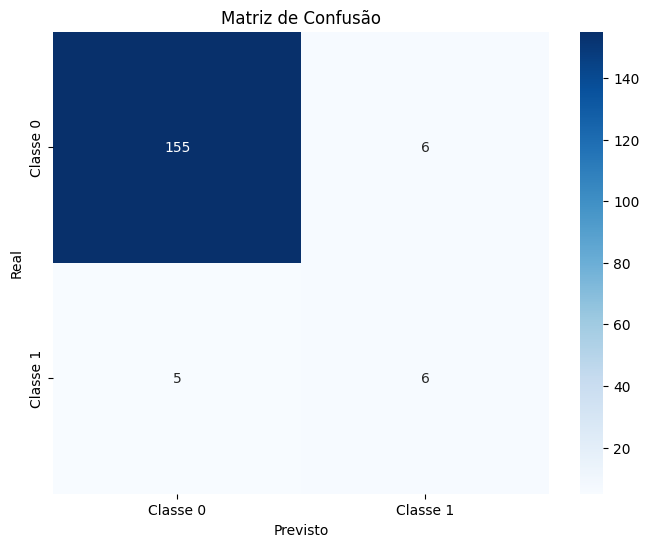

In [19]:
# Calcule a matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels = [0, 1])

# Crie um heatmap da matriz de confusão usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [20]:
#Número máximo alcançado, limpeza do código pode ser necessária

clf = GridSearchCV(LogisticRegression(), parameters['Logistic Regression'], cv = 5)
clf.fit(X, y)

best_model = clf.best_estimator_
best_score = score

# Obtenha os coeficientes
coeficientes = best_model.coef_[0]

# Ajuste um modelo de regressão logística com statsmodels para calcular os p-values
log_reg_sm = sm.Logit(y, sm.add_constant(X))
result = log_reg_sm.fit()
p_values = result.pvalues[1:]

# Crie um gráfico de barras para visualizar os coeficientes e seus p-values
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(features, coeficientes, color='skyblue')

# Adicione a significância estatística aos coeficientes
for i, (coef, p_value) in enumerate(zip(coeficientes, p_values)):
    ax.text(coef, i, f'({p_value:.2f})', va='center')

ax.set_xlabel('Magnitude dos Coeficientes')
ax.set_ylabel('Features')
ax.set_title('Coeficientes do Modelo de Regressão Logística')
plt.show()

         Current function value: inf
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


LinAlgError: Singular matrix

In [21]:
#TESTE

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Ajuste do modelo com GridSearchCV
clf = GridSearchCV(LogisticRegression(), parameters['Logistic Regression'], cv=5)
clf.fit(X, y)

# Melhor estimador do modelo
best_model = clf.best_estimator_

# Coeficientes do modelo
coeficientes = best_model.coef_[0]

# Ajuste um modelo de regressão logística com statsmodels para calcular os p-values
log_reg_sm = sm.Logit(y, sm.add_constant(X))
result = log_reg_sm.fit()
p_values = result.pvalues[1:]  # Ignorar o p-value do intercepto

# Gráfico de barras para coeficientes e p-values
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(X.columns, coeficientes, color='skyblue')

# Adicionar valores de p aos coeficientes
for i, (coef, p_value) in enumerate(zip(coeficientes, p_values)):
    ax.text(coef, i, f'({p_value:.2f})', va='center')

ax.set_xlabel('Magnitude dos Coeficientes')
ax.set_ylabel('Features')
ax.set_title('Coeficientes do Modelo de Regressão Logística')
plt.show()

         Current function value: inf
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


LinAlgError: Singular matrix

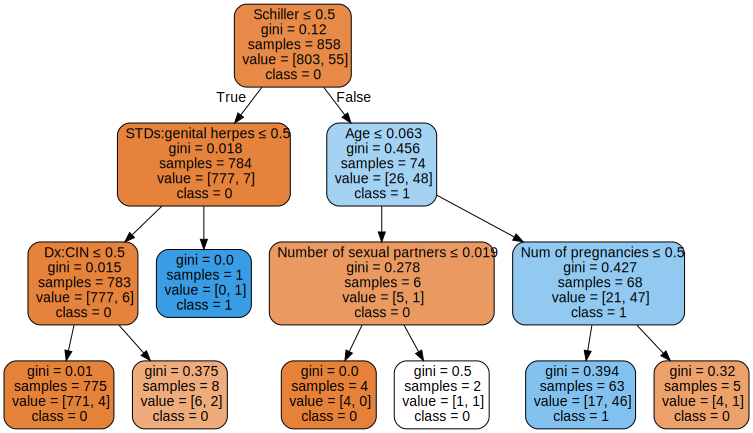

In [ ]:
clf = GridSearchCV(DecisionTreeClassifier(), parameters['Decision Tree'], cv = 5)
clf.fit(X, y)

best_model = clf.best_estimator_
best_score = score

def viewDecisionTree(model, column_names):
    '''Visualise the decision tree'''

    dot_data = tree.export_graphviz(model, out_file=None,
            feature_names=column_names,
            class_names=[str(classe) for classe in model.classes_],
            filled=True, rounded=True,
            special_characters=True)
    graph = graphviz.Source(dot_data)
    return graph


viewDecisionTree(best_model, features)

#Conclusão



#Referências

Fernandes K, Chicco D, Cardoso JS, Fernandes J. 2018. Supervised deep learning embeddings for the prediction of cervical cancer diagnosis. PeerJ Computer Science 4:e154 https://doi.org/10.7717/peerj-cs.154

Fernandes, K., Cardoso, J. S., & Fernandes, J. (2017). Transfer Learning with Partial Observability Applied to Cervical Cancer Screening. Lecture Notes in Computer Science, 243–250. doi:10.1007/978-3-319-58838-4_27

